---
title: "KMeans Clustering Analysis"
date: "`r Sys.Date()`"
format: html
---


In [1]:
# Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("lightcast_job_postings.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Columns: 131 entries, ID to NAICS_2022_6_NAME
dtypes: bool(2), float64(11), int64(27), object(91)
memory usage: 71.5+ MB


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,2024-09-06,2024-09-06 20:32:57.352 Z,0,2024-06-02,2024-06-08,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44,Retail Trade,441,Motor Vehicle and Parts Dealers,4413,"Automotive Parts, Accessories, and Tire Retailers",44133,Automotive Parts and Accessories Retailers,441330,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,2024-08-02,2024-08-02 17:08:58.838 Z,0,2024-06-02,2024-08-01,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56,Administrative and Support and Waste Managemen...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-07,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52,Finance and Insurance,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-20,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52,Finance and Insurance,522,Credit Intermediation and Related Activities,5221,Depository Credit Intermediation,52211,Commercial Banking,522110,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,2024-06-19,2024-06-19 07:00:00.000 Z,0,2024-06-02,2024-06-17,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99,Unclassified Industry,999,Unclassified Industry,9999,Unclassified Industry,99999,Unclassified Industry,999999,Unclassified Industry


In [4]:
# Data Cleaning

In [5]:
selected_features = [
    'REMOTE_TYPE_NAME', 
    'STATE_NAME', 
    'CITY_NAME', 
    'LOT_OCCUPATION_NAME',
    'MIN_EDULEVELS_NAME', 
    'SALARY'
]

X = df[selected_features]

X = X.dropna()


In [6]:
salary = X['SALARY']
X_others = X.drop(columns=['SALARY'])

X_encoded = pd.get_dummies(X_others)

scaler = StandardScaler()
salary_scaled = scaler.fit_transform(salary.values.reshape(-1, 1))

X_final = np.concatenate([X_encoded.values, salary_scaled], axis=1)

X_encoded.index = X.index


In [7]:
# Train/Test Split

In [8]:
X_train, X_test, train_idx, test_idx = train_test_split(
    X_final, X_encoded.index, test_size=0.2, random_state=688
)



In [9]:
# Finding K using Elbow Method

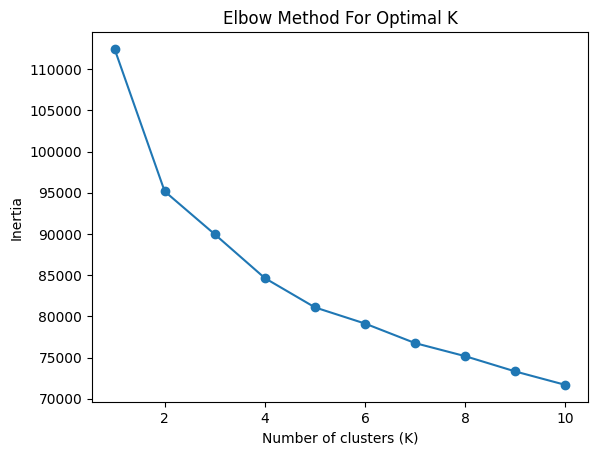

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [11]:
optimal_k = 4


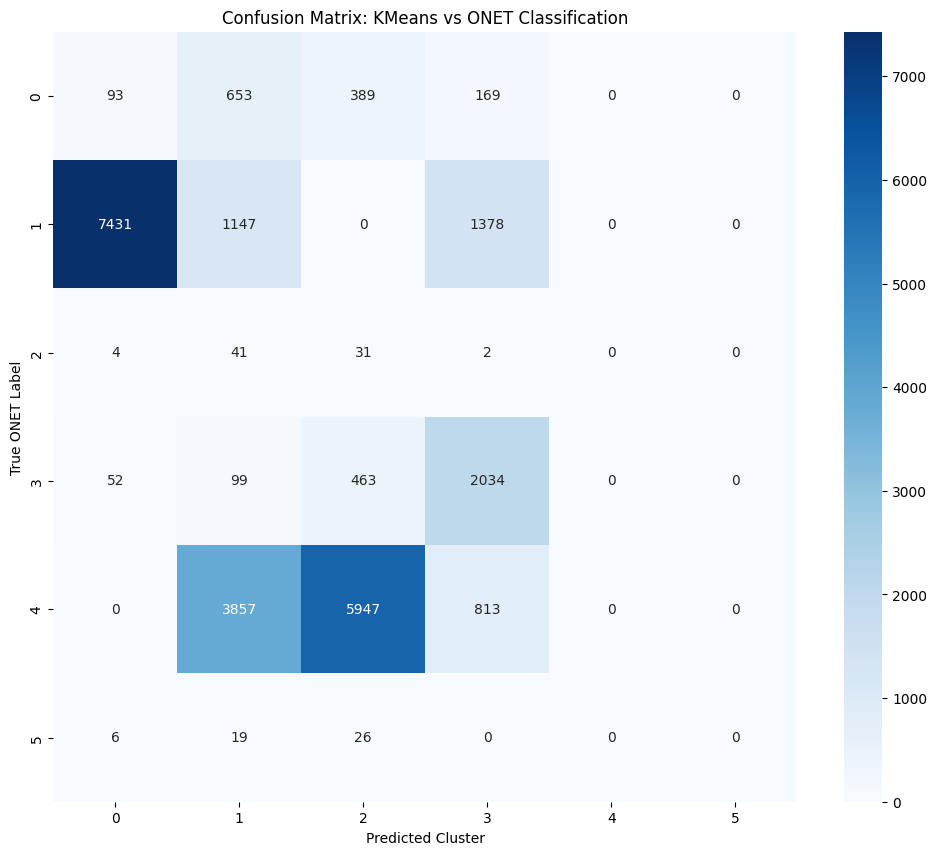

In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=688)
train_clusters = kmeans.fit_predict(X_train)

true_labels_train = df.loc[train_idx, 'LOT_OCCUPATION_NAME']

le = LabelEncoder()
true_labels_encoded = le.fit_transform(true_labels_train)

conf_mat = confusion_matrix(true_labels_encoded, train_clusters)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Cluster')
plt.ylabel('True ONET Label')
plt.title('Confusion Matrix: KMeans vs ONET Classification')
plt.show()



In [17]:
# Choropleth Map

In [29]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Washington, D.C. (District of Columbia)': 'DC'
}

state_salary['STATE_ABBREV'] = state_salary['STATE_NAME'].map(state_abbrev)

print(state_salary['STATE_ABBREV'].isnull().sum())


0


In [31]:
import plotly.express as px

fig = px.choropleth(
    state_salary,
    locations='STATE_ABBREV',  
    locationmode="USA-states",
    color='SALARY',
    scope="usa",
    color_continuous_scale="Blues",
    title="Average Salary by State"
)

fig.write_html("average_salary_by_state.html")


![Average Salary by State](iframe_figures/Average Salary by State.png)


In [ ]:
X_train_clustered = pd.DataFrame(X_train, index=train_idx)
X_train_clustered['Cluster'] = train_clusters
X_train_clustered['STATE_NAME'] = df.loc[train_idx, 'STATE_NAME']
X_train_clustered['REMOTE_TYPE_NAME'] = df.loc[train_idx, 'REMOTE_TYPE_NAME']
X_train_clustered['SALARY'] = df.loc[train_idx, 'SALARY']

X_train_clustered.head()


,0,1,2,3,4,5,6,7,8,9,...,2374,2375,2376,2377,2378,2379,Cluster,STATE_NAME,REMOTE_TYPE_NAME,SALARY
26952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.124863,2,New York,Remote,112320.0
67255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.054728,0,Illinois,[None],120425.0
31372,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.978922,1,Ohio,[None],73776.0
63539,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.058965,2,Hawaii,[None],115294.0
33281,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.397850,1,Michigan,[None],100000.0


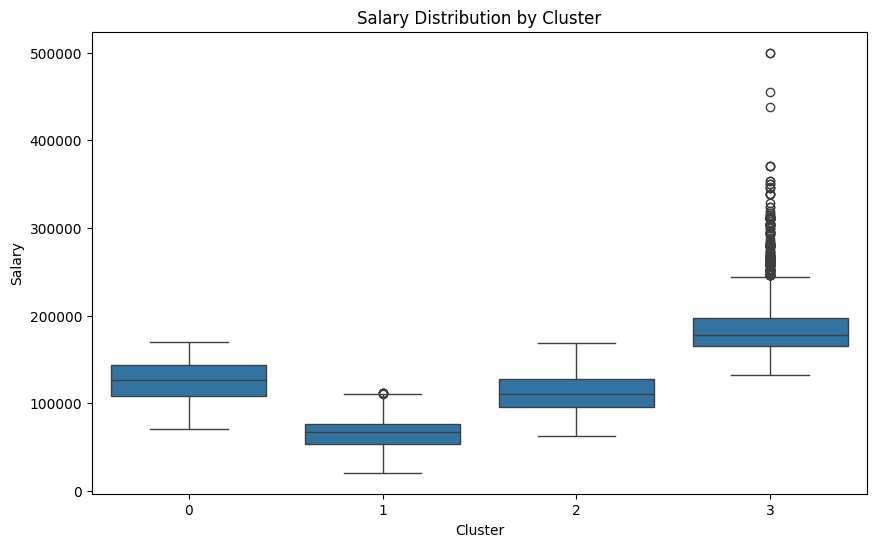

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='SALARY', data=X_train_clustered)
plt.title('Salary Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Salary')
plt.show()


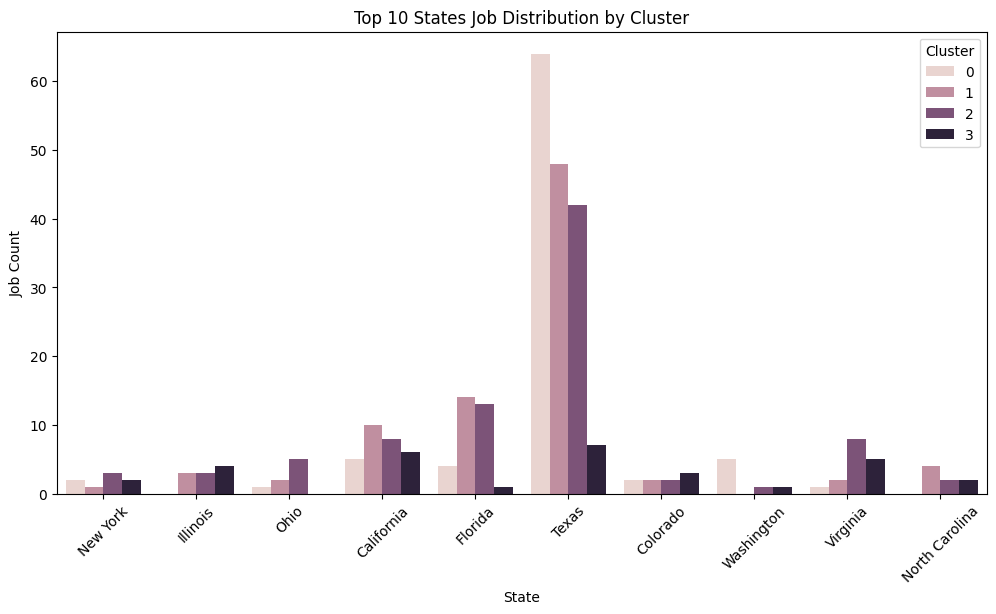

In [35]:
top_states = X_train_clustered['STATE_NAME'].value_counts().nlargest(10).index
subset = X_train_clustered[X_train_clustered['STATE_NAME'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.countplot(x='STATE_NAME', hue='Cluster', data=subset)
plt.title('Top 10 States Job Distribution by Cluster')
plt.xlabel('State')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()
